# Classification of handwritten digits

1. Check the performance of the logistic regression model (perceptron) on the digits dataset.
2. Plot digits for which the classifier is wrong
3. Find nearest neighbors of the test set in the train set using cosine similarity or Euclidean distance
4. Compare the performance with the $K$-nearest neighbors model
5. Assume no known labels and cluster using $K$-means algorithm

## Opening the dataset, train test split

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

def show_digit(image):
    plt.imshow(image, cmap=plt.cm.gray_r)

In [2]:
from sklearn.model_selection import train_test_split

X = digits.images.reshape(-1, 64)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [3]:
X.shape, X_train.shape, X_test.shape

((1797, 64), (1437, 64), (360, 64))

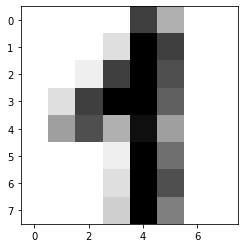

In [4]:
show_digit(digits.images[42])

In [5]:
X[42]  # Flattened array of pixels

array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

## Logistic Regression (supervised)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [7]:
model.score(X_train, y_train)

1.0

In [8]:
model.score(X_test, y_test)

0.9611111111111111

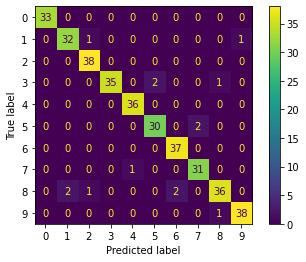

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

<BarContainer object of 10 artists>

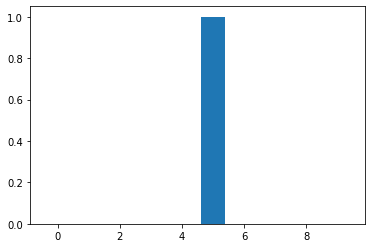

In [10]:
bad_sample = list(model.predict(X_test) != y_test).index(True)
proba = model.predict_proba(X_test[bad_sample].reshape(1, -1)).reshape(-1)
plt.bar(range(10), proba)

In [11]:
proba

array([5.79728574e-083, 4.85386388e-037, 2.88465221e-124, 5.62869987e-021,
       3.66939726e-058, 1.00000000e+000, 3.25395018e-043, 3.76393605e-083,
       4.39729640e-061, 2.15248455e-032])

/tmp/ipykernel_149693/528181112.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.bar(range(10), np.log(proba / (1 - proba)))


<BarContainer object of 10 artists>

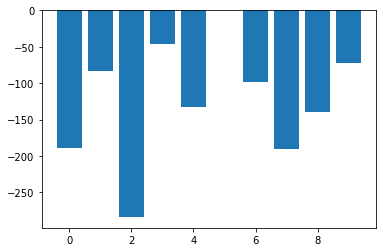

In [12]:
import numpy as np

plt.bar(range(10), np.log(proba / (1 - proba)))

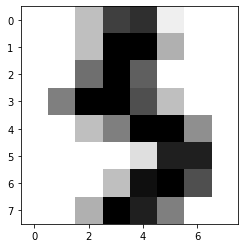

In [13]:
show_digit(X_test[bad_sample].reshape(8, 8))

In [14]:
y_test[bad_sample]

3

## Nearest neighbors of the test set on the train set

In [15]:
%%time
from sklearn.metrics.pairwise import cosine_similarity

# Similarité cosinus
similarity = cosine_similarity(X_train, X_train)

CPU times: user 33.4 ms, sys: 69.3 ms, total: 103 ms
Wall time: 19.2 ms


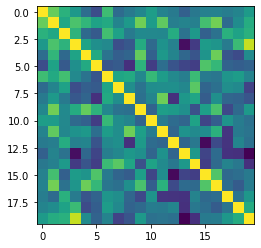

In [16]:
plt.imshow(similarity[:20, :20])

In [17]:
similarity = cosine_similarity(X_test, X_train)

In [18]:
similarity.shape

(360, 1437)

In [19]:
closest_neighbors = similarity[bad_sample].argsort()[-5:]

In [20]:
closest_neighbors

array([ 768,  964,  311,  607, 1402])

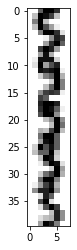

In [21]:
show_digit(X_train[closest_neighbors].reshape(-1, 8))

In [22]:
y_train[closest_neighbors]

array([5, 9, 5, 3, 3])

## $k$-nearest neighbor algorithm (supervised)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9805555555555555

## Coordinates according to two principal components (unsupervised)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_train_red = pca.fit_transform(X_train)
X_train_red.shape

(1437, 2)

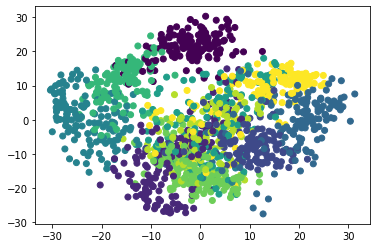

In [25]:
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c=y_train)

## $K$-means (unsupervised)

In [26]:
from sklearn.cluster import KMeans

km = KMeans(10)
km.fit(X_train)

KMeans(n_clusters=10)

In [27]:
km.labels_

array([2, 3, 1, ..., 5, 2, 4], dtype=int32)

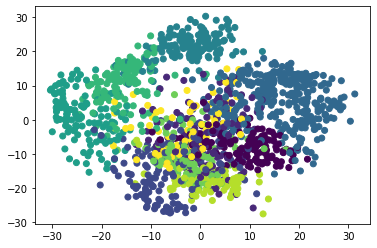

In [28]:
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c=km.labels_)

In [29]:
km.labels_[y_train == 0]  # Found a cluster containing all zeroes

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [30]:
km.labels_[y_train == 1]  # But 1 is harder

array([2, 9, 2, 9, 2, 0, 9, 2, 2, 2, 9, 9, 0, 0, 2, 9, 9, 2, 2, 9, 6, 0,
       2, 9, 9, 2, 2, 9, 2, 2, 0, 2, 0, 0, 9, 2, 9, 9, 0, 0, 9, 9, 9, 2,
       9, 9, 2, 2, 9, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 9, 9, 2, 2, 9,
       9, 2, 0, 2, 6, 2, 2, 9, 2, 2, 9, 2, 2, 9, 2, 9, 0, 2, 2, 2, 2, 9,
       6, 0, 2, 2, 2, 9, 2, 2, 9, 0, 9, 2, 2, 9, 2, 9, 2, 2, 2, 2, 2, 9,
       2, 0, 2, 2, 0, 9, 0, 2, 9, 9, 9, 2, 9, 2, 2, 9, 9, 9, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 9, 9, 2, 2, 2, 2, 9, 2, 0, 2, 2], dtype=int32)

In [31]:
from collections import Counter

for i in range(10):
    cluster = (km.labels_ == i)
    print('Cluster', i, 'contains', Counter(y_train[cluster]))

Cluster 0 contains Counter({2: 121, 1: 20, 8: 4})
Cluster 1 contains Counter({5: 116, 8: 5, 9: 3, 3: 2})
Cluster 2 contains Counter({1: 78, 8: 72, 2: 6, 3: 4, 6: 2})
Cluster 3 contains Counter({3: 133, 9: 115, 8: 41, 5: 31, 2: 8})
Cluster 4 contains Counter({0: 144, 6: 1})
Cluster 5 contains Counter({4: 130, 5: 1, 0: 1})
Cluster 6 contains Counter({6: 140, 1: 3, 8: 2, 5: 2})
Cluster 7 contains Counter({7: 67, 9: 7, 8: 6, 3: 4, 2: 3, 4: 2})
Cluster 8 contains Counter({7: 80, 4: 6, 3: 2, 9: 1})
Cluster 9 contains Counter({1: 47, 9: 15, 4: 7, 8: 3, 2: 1, 6: 1})


(<matplotlib.image.AxesImage at 0x7f1e0c104b80>, array([8, 8, 1, 8, 1]))

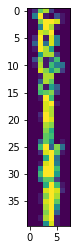

In [32]:
cluster = (km.labels_ == 2)
plt.imshow(X_train[cluster][:5].reshape(-1, 8)), y_train[cluster][:5]